In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.special import entr
from sklearn.decomposition import PCA

In [2]:
nba_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv')

In [3]:
filterdata = nba_data.copy()
filterdata = filterdata[filterdata['GS'] >= 20]
filterdata = filterdata[filterdata['MP'] >= 10]
filterdata = filterdata.reset_index(drop=True)
filterdata

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
1,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
2,2019,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
3,2019,Jarrett Allen,C,20,BRK,80,80,26.2,4.2,7.1,...,0.709,2.4,6.0,8.4,1.4,0.5,1.5,1.3,2.3,10.9
4,2019,Al-Farouq Aminu,PF,28,POR,81,81,28.3,3.2,7.3,...,0.867,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016,Deron Williams,PG,31,DAL,65,63,32.4,4.9,11.9,...,0.869,0.3,2.6,2.9,5.8,0.9,0.2,2.3,2.4,14.1
800,2016,Lou Williams,SG,29,LAL,67,35,28.5,4.2,10.3,...,0.830,0.5,2.1,2.5,2.5,0.9,0.3,1.6,1.6,15.3
801,2016,Marvin Williams,PF,29,CHO,81,81,28.9,4.2,9.2,...,0.833,1.6,4.9,6.4,1.4,0.7,1.0,0.8,1.6,11.7
802,2016,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,...,0.644,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1


In [4]:
funcols = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']
fundata = filterdata[funcols]
fundata.head()

,PTS,TRB,AST,STL,BLK,TOV
0,13.9,9.5,1.6,1.5,1.0,1.7
1,8.9,7.3,2.2,0.9,0.8,1.5
2,21.3,9.2,2.4,0.5,1.3,1.8
3,10.9,8.4,1.4,0.5,1.5,1.3
4,9.4,7.5,1.3,0.8,0.4,0.9


In [5]:
scaler = StandardScaler()
fundata = scaler.fit_transform(fundata)
fundata

array([[ 0.11463777,  1.6129094 , -0.61781554,  1.3932204 ,  0.82400066,
         0.02351072],
       [-0.7449851 ,  0.76862715, -0.33088552, -0.05027084,  0.42016248,
        -0.21883054],
       [ 1.38687962,  1.49778   , -0.23524218, -1.01259833,  1.42975792,
         0.14468135],
       ...,
       [-0.2635963 ,  0.42323896, -0.71345889, -0.53143459,  0.82400066,
        -1.06702496],
       [ 0.32094726,  1.42102707, -0.5221722 ,  1.3932204 , -0.18559478,
         0.26585198],
       [-0.77937002,  0.34648603, -0.90474557, -0.29085271,  0.62208157,
        -0.94585433]])

In [6]:
k = 5
model1 = KMeans(n_clusters=k, random_state=36)
model1.fit_transform(fundata)
model1_centers = pd.DataFrame(scaler.inverse_transform(model1.cluster_centers_),
                             columns=funcols)

model2 = GaussianMixture(n_components=k)
model2.fit(fundata)
model2_centers = pd.DataFrame(scaler.inverse_transform(model2.means_),
                             columns=funcols)

display(
    model1_centers,
    model2_centers
)

,PTS,TRB,AST,STL,BLK,TOV
0,18.730303,10.577273,2.603030,0.972727,1.692424,2.315152
1,7.755155,3.478351,1.409794,0.608247,0.356186,0.906701
2,19.760839,5.234965,6.290909,1.397203,0.456643,2.881818
3,11.485185,7.238272,1.660494,0.683951,0.926543,1.383333
4,13.441004,4.036820,2.975732,1.035983,0.333473,1.616318


,PTS,TRB,AST,STL,BLK,TOV
0,8.003753,3.527944,1.387128,0.632568,0.355575,0.896644
1,16.781840,5.682079,5.622581,1.534914,0.557403,2.579579
2,14.836067,3.264136,4.046396,0.926527,0.242617,1.948785
3,11.952627,6.158109,1.639254,0.824883,0.681136,1.334692
4,17.076034,9.394345,2.807799,0.878973,1.441231,2.146881


In [7]:
k = 7
model3 = KMeans(n_clusters=k, random_state=36)
model3.fit_transform(fundata)
model3_centers = pd.DataFrame(scaler.inverse_transform(model3.cluster_centers_),
                             columns=funcols)

model4 = GaussianMixture(n_components=k)
model4.fit(fundata)
model4_centers = pd.DataFrame(scaler.inverse_transform(model4.means_),
                             columns=funcols)

display(
    model3_centers,
    model4_centers
)

,PTS,TRB,AST,STL,BLK,TOV
0,24.603226,8.374194,7.803226,1.603226,0.809677,3.941935
1,7.517318,3.484916,1.373743,0.592179,0.355307,0.884916
2,11.285714,4.885714,2.130769,1.354945,0.498901,1.300000
3,17.755000,10.473333,2.343333,0.921667,1.743333,2.140000
4,14.282143,3.709524,3.152976,0.838095,0.276786,1.710119
5,11.492000,7.265333,1.666667,0.654667,0.937333,1.388000
6,18.525600,4.716000,5.784800,1.336800,0.400800,2.627200


,PTS,TRB,AST,STL,BLK,TOV
0,12.015353,6.310508,1.535713,0.681597,0.738261,1.288498
1,14.709408,3.107615,3.960358,0.868274,0.206931,1.886105
2,17.126171,4.617954,5.617491,1.472062,0.422269,2.525693
3,19.063293,8.371892,5.547517,1.148812,1.020601,2.823882
4,11.939553,5.445149,2.274177,1.179409,0.562097,1.546639
5,16.843610,10.699811,1.789718,0.832934,1.754858,2.021354
6,7.819973,3.481511,1.329907,0.637981,0.358877,0.875388


In [8]:
playerprobs = pd.DataFrame(model2.predict_proba(fundata))

filterdata['label'] = playerprobs.idxmax(axis=1)
filterdata['probs'] = playerprobs.max(axis=1)

display(
    filterdata.sort_values(by='probs', ascending=False).head(5),
    filterdata.sort_values(by='probs', ascending=True).head(5)
)

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,label,probs
797,2016,Hassan Whiteside,C,26,MIA,73,43,29.1,5.7,9.3,...,8.6,11.8,0.4,0.6,3.7,1.9,2.8,14.2,4,1.0
252,2018,Anthony Davis,PF,24,NOP,75,75,36.4,10.4,19.5,...,8.6,11.1,2.3,1.5,2.6,2.2,2.1,28.1,4,1.0
49,2019,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,...,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9,4,1.0
351,2018,Kristaps Porziņģis,PF,22,NYK,48,48,32.4,8.1,18.5,...,5.3,6.6,1.2,0.8,2.4,1.9,2.9,22.7,4,1.0
443,2017,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0,4,1.0


,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,label,probs
571,2017,Terrence Ross,SF,25,TOT,78,24,25.1,4.2,9.6,...,2.4,2.6,1.1,1.1,0.4,0.9,1.8,11.0,3,0.432977
564,2017,Josh Richardson,SG,23,MIA,53,34,30.5,3.8,9.7,...,2.5,3.2,2.6,1.1,0.7,1.2,2.5,10.2,0,0.443132
588,2017,Garrett Temple,SG,30,SAC,65,21,26.6,2.8,6.6,...,2.3,2.8,2.6,1.3,0.4,1.2,2.2,7.8,2,0.456233
171,2019,Pascal Siakam,PF,24,TOR,80,79,31.9,6.5,11.8,...,5.3,6.9,3.1,0.9,0.7,1.9,3.0,16.9,3,0.478756
390,2018,Taurean Waller-Prince,SF,23,ATL,82,82,30.0,5.1,11.9,...,4.1,4.7,2.6,1.0,0.5,2.3,2.0,14.1,3,0.481219


In [9]:
filterdata['label'].value_counts()

3    246
2    189
0    167
1    107
4     95
Name: label, dtype: int64

In [10]:
X = filterdata[funcols]
y = filterdata['label']

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

/opt/miniconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


In [11]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

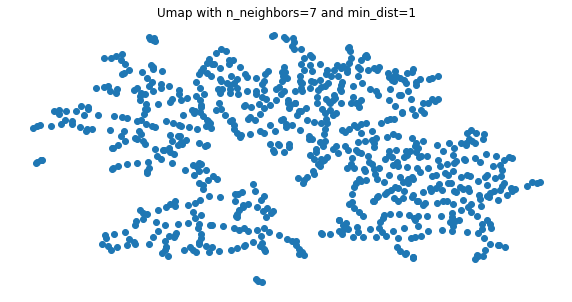

In [12]:
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=7 and min_dist=1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [13]:
pca = PCA(n_components=5)
pca_components = pca.fit_transform(X)

In [14]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [16]:
playerprobs = pd.DataFrame(model4.predict_proba(fundata))

filterdata['label'] = playerprobs.idxmax(axis=1)
filterdata['probs'] = playerprobs.max(axis=1)

display(
    filterdata.sort_values(by='probs', ascending=False).head(5),
    filterdata.sort_values(by='probs', ascending=True).head(5)
)

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,label,probs
689,2016,Draymond Green,PF,25,GSW,81,81,34.7,5.0,10.1,...,7.8,9.5,7.4,1.5,1.4,3.2,3.0,14.0,3,1.0
192,2019,Russell Westbrook,PG,30,OKC,73,73,36.0,8.6,20.2,...,9.6,11.1,10.7,1.9,0.5,4.5,3.4,22.9,3,1.0
603,2017,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,3,1.0
477,2017,Draymond Green,PF,26,GSW,76,76,32.5,3.6,8.6,...,6.6,7.9,7.0,2.0,1.4,2.4,2.9,10.2,3,1.0
111,2019,Nikola Jokić,C,23,DEN,80,80,31.3,7.7,15.1,...,8.0,10.8,7.3,1.4,0.7,3.1,2.9,20.1,3,1.0


,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,label,probs
676,2016,Kevin Garnett,PF,39,MIN,38,38,14.6,1.4,3.0,...,3.6,3.9,1.6,0.7,0.3,0.4,1.8,3.2,6,0.295187
153,2019,Cedi Osman,SF,23,CLE,76,75,32.2,4.7,11.1,...,4.1,4.7,2.6,0.8,0.1,1.5,2.6,13.0,6,0.417404
27,2019,Malcolm Brogdon,SG,26,MIL,64,64,28.6,5.9,11.7,...,3.5,4.5,3.2,0.7,0.2,1.4,1.6,15.6,4,0.437405
196,2019,Kenrich Williams,SF,24,NOP,46,29,23.5,2.3,6.1,...,3.6,4.8,1.8,1.0,0.4,0.8,2.1,6.1,4,0.440718
530,2017,Wesley Matthews,SG,30,DAL,73,73,34.2,4.6,11.6,...,3.3,3.5,2.9,1.1,0.2,1.4,2.2,13.5,1,0.455388


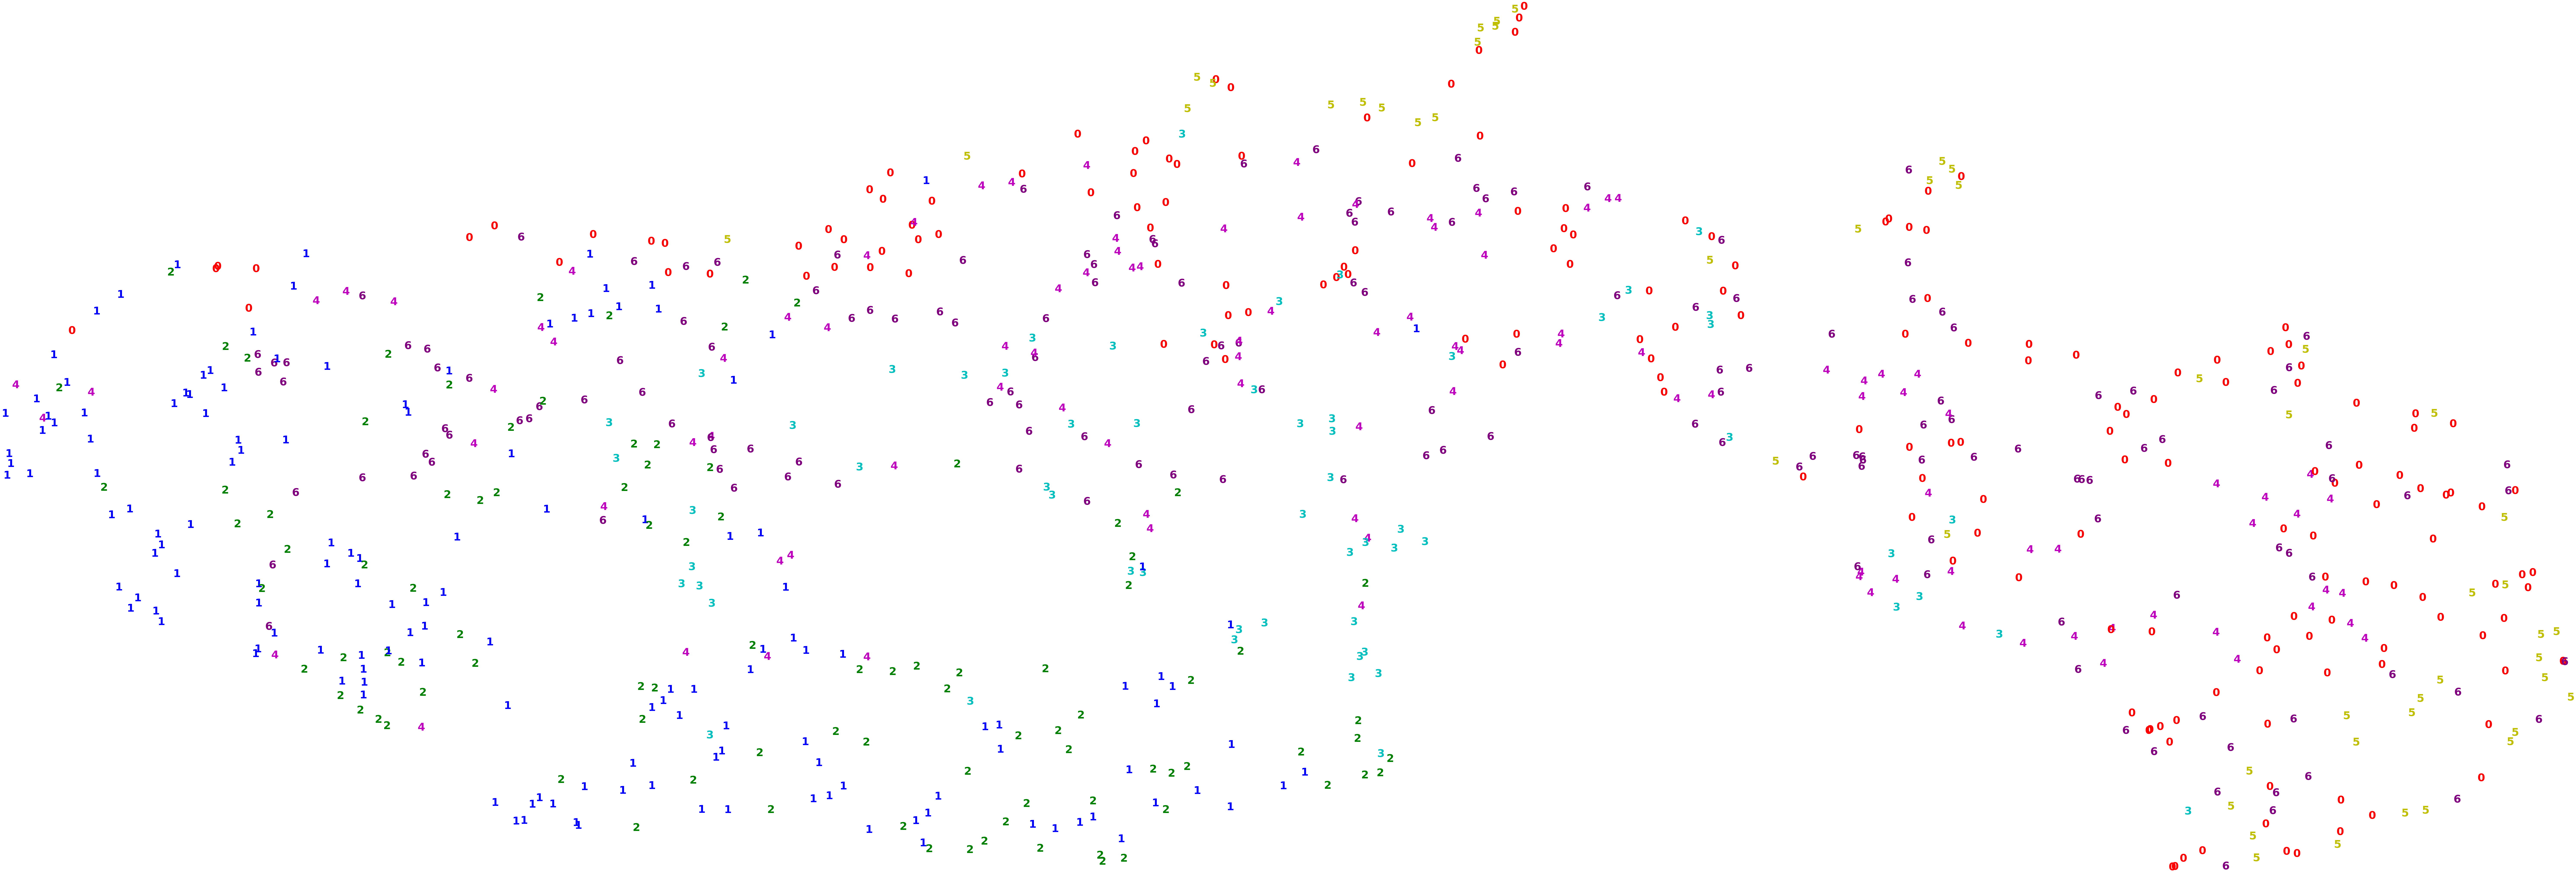

In [21]:
X = filterdata[funcols]
y = filterdata['label']

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","purple"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()